Importando librerias necesarias:

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import classification_report, mean_squared_error, r2_score, accuracy_score,confusion_matrix


cargar los datos (del data set):

In [73]:
data = pd.read_csv('CAR_DETAILS_FROM_CAR_DEKHO.csv')

In [75]:
##lo que hago aqui es mostrar las primeras 5 filas para comprobar que el data set se importo con exactitud

In [77]:
print(data.head())

                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  


In [79]:
##antes de hacer el preprocesamiento buscamos en nombre de la columna target para poder analizar los datos

In [81]:
print(data.columns)


Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')


In [83]:
##antes de comenzar a realizar los diseños realizamos el preprocesamiento limpiando los datos, eliminando duplicados etc EN ESTE CASO USAMOS COMO COLUMNA TARGET (selling_price)

In [85]:
data.ffill(inplace=True)  # Imputación hacia adelante

# Ajusta según el nombre de tu columna objetivo
target_column = 'selling_price'

# Codificación de variables categóricas
data = pd.get_dummies(data, drop_first=True)  # Esto convierte variables categóricas en variables dummy

X = data.drop(target_column, axis=1)
y = data[target_column]


# Dividir en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [87]:
##Lo que se hace en el siguiente bloque es diseñar el modelo de regresion lineal y su aplicación:

In [89]:


###regresion_lineal = LinearRegression()
###regresion_lineal.fit(X_train, y_train)


###y_pred_lineal = regresion_lineal.predict(X_test)
###mse = mean_squared_error(y_test, y_pred_lineal)
###r2 = r2_score(y_test, y_pred_lineal)

###print("Regresión Lineal:")
###print(f"Error cuadrático medio: {mse}")
###print(f"R^2: {r2}")

In [91]:
##ahora procedemos con el diseño de regresion logistica pero antes debemos convertir la variable selling price en una variable categorica

In [93]:

data.ffill(inplace=True)


average_price = data['selling_price'].mean()
data['price_category'] = (data['selling_price'] > average_price).astype(int)


data = pd.get_dummies(data, drop_first=True)


X = data.drop(['selling_price', 'price_category'], axis=1)
y_class = data['price_category']       # Para clasificación
y_reg = data['selling_price']           # Para regresión


X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)
_, _, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)


linear_model = LinearRegression()
linear_model.fit(X_train, y_train_reg)
y_pred_linear = linear_model.predict(X_test)


print("Regresión Lineal:")
print(f"MSE: {mean_squared_error(y_test_reg, y_pred_linear)}")
print(f"R2 Score: {r2_score(y_test_reg, y_pred_linear)}\n")

#Regresion logistica
logistic_model = LogisticRegression(max_iter=7000)
logistic_model.fit(X_train, y_train_class)
y_pred_logistic = logistic_model.predict(X_test)


print("Regresión Logística:")
print(f"Precisión: {accuracy_score(y_test_class, y_pred_logistic)}")
print(f"Reporte de clasificación:\n{classification_report(y_test_class, y_pred_logistic)}\n")

#arbol de desicion
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train_class)
y_pred_tree = tree_model.predict(X_test)


print("Árbol de Decisión:")
print(f"Precisión: {accuracy_score(y_test_class, y_pred_tree)}")
print(f"Reporte de clasificación:\n{classification_report(y_test_class, y_pred_tree)}")

Regresión Lineal:
MSE: 4.097974201003503e+22
R2 Score: -134284836625.1998

Regresión Logística:
Precisión: 0.8444700460829493
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       578
           1       0.79      0.72      0.76       290

    accuracy                           0.84       868
   macro avg       0.83      0.81      0.82       868
weighted avg       0.84      0.84      0.84       868


Árbol de Decisión:
Precisión: 0.8283410138248848
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       578
           1       0.77      0.69      0.73       290

    accuracy                           0.83       868
   macro avg       0.81      0.79      0.80       868
weighted avg       0.83      0.83      0.83       868



In [66]:
#analisis exploratorio: obtenemos valores como desviacion estandar, numero de observaciones no nulas, media, valor minimo media, mediana y moda con sus cuartiles y el valor maximo

In [68]:
print(data.describe())
sns.pairplot(data)
plt.show()

              year  selling_price      km_driven  price_category
count  4340.000000   4.340000e+03    4340.000000     4340.000000
mean   2013.090783   5.041273e+05   66215.777419        0.336636
std       4.215344   5.785487e+05   46644.102194        0.472614
min    1992.000000   2.000000e+04       1.000000        0.000000
25%    2011.000000   2.087498e+05   35000.000000        0.000000
50%    2014.000000   3.500000e+05   60000.000000        0.000000
75%    2016.000000   6.000000e+05   90000.000000        1.000000
max    2020.000000   8.900000e+06  806599.000000        1.000000


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x0000026B7C1011C0> (for post_execute), with arguments args (),kwargs {}:


ValueError: Image size of 376250x376250 pixels is too large. It must be less than 2^16 in each direction.


KeyboardInterrupt



<Figure size 376250x376250 with 2595 Axes>

In [37]:
# Se elige un modelo de RandomForestClassifier, que es un algoritmo de aprendizaje automático basado en árboles de decisión. y entrenamos el modelo 


In [95]:
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=10)

In [97]:
#proporciona métricas como precisión, recall y F1-score. Estas métricas ayudan a evaluar cómo de bien está funcionando el modelo.

In [99]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       20000       0.00      0.00      0.00         1
       30000       0.00      0.00      0.00         0
       35000       0.00      0.00      0.00         1
       40000       0.00      0.00      0.00         1
       43000       0.00      0.00      0.00         1
       45000       0.14      1.00      0.25         1
       50000       0.00      0.00      0.00         1
       51111       0.00      0.00      0.00         1
       55000       0.00      0.00      0.00         1
       57000       0.00      0.00      0.00         1
       58000       0.00      0.00      0.00         1
       60000       0.50      0.20      0.29         5
       65000       0.50      0.25      0.33         4
       68000       0.33      1.00      0.50         1
       69000       1.00      1.00      1.00         1
       70000       0.00      0.00      0.00         4
       72000       0.00      0.00      0.00         0
       73000       0.00    

C:\Users\Kevin Pinto\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Kevin Pinto\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Kevin Pinto\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Kevin Pinto\anaconda3

In [ ]:
#Se crea una matriz de confusión que muestra el rendimiento del modelo en términos de verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.

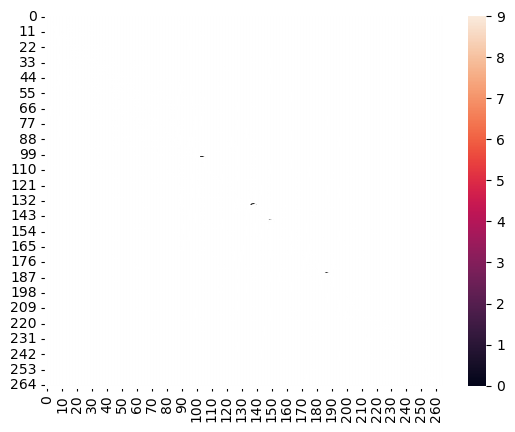

In [101]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()
